### 4.3.1: Introduction to Network Analysis
Learn about the basic components of networks and the graphs that represent them

Learn basic network concepts such as neighbor, degree, path, component, and largest connected component

Many systems of scientific and societal interest consist of a large number of interacting components.

The structure of these systems can be represented as networks where network **nodes** represent the components,
and network **edges,** the interactions between the components.

This case study first introduces some basic concepts about networks, we'll then write a Python function to generate very simple random graphs, and finally, we'll analyze some basic properties of social networks collected
in different rural villages in India.

Basic network concepts: **neighbor, degree, path, component,  largest connected component**

### 4.3.2: Basics of NetworkX
Learn how to use the NetworkX module to create and manipulate network graphs.

Networks are created and manipulated using the NetworkX module.

In [39]:
import networkx as nx

In [40]:
# We can create an instance of an undirected graph using that Graph function.
G = nx.Graph()

In [41]:
# We can now add nodes one at a time or several at a time.
G.add_node(1)
G.add_nodes_from([2,3]) # nodi multipli in un list
G.add_nodes_from(["u","v"]) # possiamo usare anche stringhe

# We can also get a list of the current nodes.
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [42]:
# Similar functions exist also for adding edges. Remember that edges are treated as pairs of nodes.
G.add_edge(1,2)
G.add_edge("u","v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)]) # una list di tuple, anche se i nodi non c'erano, 
                                            # vengono aggiunti automaticamente
G.add_edge("u","w")

In [43]:
# possiamo visualizzare gli edges
G.edges() 

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [44]:
# rimuovere un nodo:
G.remove_node(2)

In [45]:
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [46]:
G.edges() # vengono rimossi anche gli edges del nodo rimosso

EdgeView([(1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [9]:
# rimuovere nodi multipli
G.remove_nodes_from([4,5])

In [10]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [11]:
G.edges()

EdgeView([(1, 3), (1, 6), ('u', 'v'), ('u', 'w')])

In [12]:
#rimuovere gli edges
G.remove_edge(1, 3) 
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [13]:
# rimuovere più di un edge
G.remove_edges_from([(1, 6),(1, 'u')])

In [14]:
G.edges()

EdgeView([('u', 'v'), ('u', 'w')])

In [15]:
# conteggi
print(G.number_of_nodes())
print(G.number_of_edges())

6
2


### 4.3.3: Graph Visualization
How to use networkx to visualize a graph.

Networkx contains many types of random graph generators.
But in addition, it also contains a few **empirical data sets**.
Let's use one of them called the **karate club graph**.
In this network, the nodes represent members of a karate club and the edges
correspond to friendships between the members.

In [48]:
G = nx.karate_club_graph()

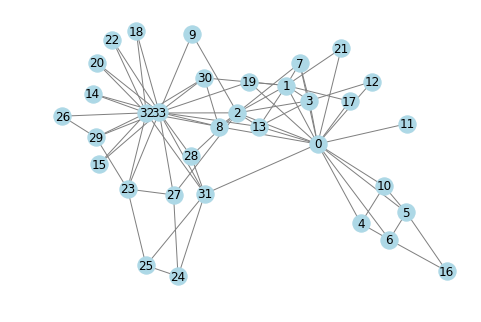

In [49]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="grey" )
plt.savefig("karate_graph.pdf")

In [50]:
# Networkx stores the degrees of nodes in a DegreeView object where the 
# keys are node IDs and the values are their associated degrees.
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [52]:
# grado di un nodo:
G.degree()[3]   # Come un dict!!!

6

In [53]:
# possiamo anche scrivere così: 
G.degree(3)

6

In [54]:
G.number_of_nodes()

34

In [55]:
G.number_of_edges()

78

In [56]:
G.degree(0) is G.degree()[0]

True

### 4.3.4: Random Graphs
The simplest possible random graph model is the so-called **Erdos-Renyi, also known as the ER graph model.**
Questa famiglia di grafi random ha due parametri, **N**, numero di nodi e **p**, probabilità di ogni coppia di nodi di essere connesso da un edge.

**Although the NetworkX library includes an Erdos-Renyi graph generator, we'll be writing our own ER function to better understand the model.**

Our task is to implement an ER model as a Python function. 
Let's first see how to implement the coin flip just one time.
To do this, we'll be using the SciPy stats module, more specifically a function called Bernoulli.
We'll first import that from SciPy stats import Bernoulli.

In [57]:
from scipy.stats import bernoulli
# una semplice funzione di probabilità che ritorna 0 o 1
bernoulli.rvs(p = 0.2) # p = probabilità di successo (che venga 1)

0

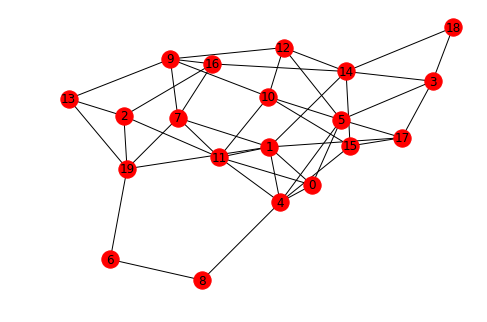

In [60]:
# Utilizziamo la precedente per creare un grafo 
# che ha un certo numero di nodi e una certa prob. che una coppia di nodi sia connessa:
N = 20 # Numero di nodi
p = 0.2 # probabilità che due nodi siano collegati

# creare un grafo vuoto
G = nx.Graph()
# popolarlo coi nodi
G.add_nodes_from(range(N))
# fare un loop tra tutte le coppie di nodi
for node1 in G.nodes():
    for node2 in G.nodes():    # ATTENZIONE: COSI' CONTIAMO OGNI COPPIA DUE VOLTE!!! Quindi vedi riga seguente
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1, node2) # aggiunge un edge con probabilità p

# disegnamo il grafo che abbiamo creato:
nx.draw(G, with_labels=True)

In [61]:
# Possiamo infine creare una function:
def er_graph(N, p):
    '''Generate an ER graph'''
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():    
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G

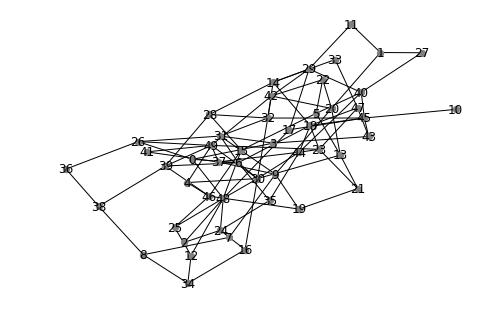

In [62]:
G = er_graph(50, 0.08)
nx.draw(G, with_labels = True, node_size = 40, node_color = "gray")

### 4.3.5: Plotting the Degree Distribution
Creiamo una function che fa il plot della distribuzione dei gradi

In [64]:
type(G.degree()) # non è più, come nelle versioni precedenti di networkx, un dictionary.
# E' però simile e si può trasformare.

networkx.classes.reportviews.DegreeView

In [65]:
dict(G.degree()).values()

dict_values([4, 3, 2, 3, 3, 4, 7, 4, 3, 5, 1, 2, 3, 4, 5, 4, 3, 3, 6, 3, 5, 3, 3, 5, 4, 3, 4, 2, 4, 5, 8, 5, 6, 2, 3, 3, 2, 5, 3, 5, 5, 2, 5, 3, 6, 6, 5, 4, 8, 8])

In [66]:
# per avere i gradi, è più corretto utilizzare la seguente:
[d for n, d in G.degree()]

[4,
 3,
 2,
 3,
 3,
 4,
 7,
 4,
 3,
 5,
 1,
 2,
 3,
 4,
 5,
 4,
 3,
 3,
 6,
 3,
 5,
 3,
 3,
 5,
 4,
 3,
 4,
 2,
 4,
 5,
 8,
 5,
 6,
 2,
 3,
 3,
 2,
 5,
 3,
 5,
 5,
 2,
 5,
 3,
 6,
 6,
 5,
 4,
 8,
 8]

In [67]:
# possiamo definire la funzione:
def plot_degree_distribution(G):
    '''plot della distribuzione dei gradi di un grafo'''
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

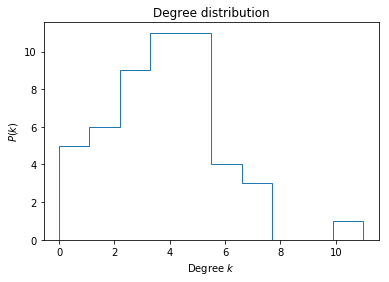

In [68]:
G = er_graph(50,0.08)
plot_degree_distribution(G)

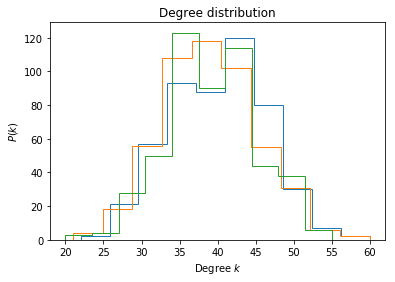

In [69]:
# Aumentiamo il numero di nodi e facciamo tre grafi
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)

### 4.3.6: Descriptive Statistics of Empirical Social Networks
* Look at the basic properties of social networks in two villages in rural India
* Compare the degree distribution of these empirical networks with the degree distribution of the ER networks

In this task, we will look at basic properties of the social networks from two different villages in rural India.
These data are part of a much larger dataset that was collected to study diffusion of micro-finance. And the findings of this study were published in an article called, "The Diffusion of Micro-finance," in the Journal Science
in 2013.

The structure of connections in a network can be captured in the **Adjacency matrix** of the network. 
Se i nodi sono n, è una **matrice n x n. Il valore ij è 1 se i j sono collegati (quindi è simmetrica).**

Abbiamo le adjacency matrix come files CSV, uno per ciascun villaggio. 
Leggiamo le adjacency matrix e costruiamo le reti tramite il metodo **to_networkx_graph()**.

In [70]:
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter = ",") # Adjacency matrix 1
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter = ",") # Adjacency matrix 2
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [35]:
# To get a basic sense of the network size and number of connections, 
# let's count the number of nodes and the number of edges in the networks.
# In addition, each node has a total number of edges, its degree.
# Let's also calculate the mean degree for all nodes in the network.

In [71]:
def basic_net_stats(G):
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" %np.mean(degree_sequence))

In [72]:
basic_net_stats(G1)

basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


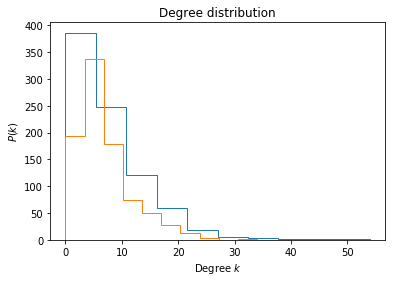

In [73]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

It seems that most people have relatively few connections,
whereas a small fraction of people have a large number of connections.
This distribution doesn't look at all symmetric,
and its tail extends quite far to the right.

This suggests that the ER graphs are likely not good models
for real world social networks.

### 4.3.7: Finding the Largest Connected Component

- Learn how to find the largest connected component in a network
- Learn how to visualize the largest connected component

In [75]:
# Molte reti sono definite da un singolo componente o in ogni caso da un componente più grande, 
# in cui ogni singolo nodo è connesso a tutti gli altri.
# Quindi, per ciascuna coppia di nodi, esiste un percorso tra loro.
# C'è una funzione per estrarre il componente più grande:
nx.connected_component_subgraphs(G1)

<generator object connected_component_subgraphs at 0x1a24e76678>

Come vediamo, il risultato è un **generator object**.
Le **generator function** non ritornano un oggetto singolo, invece sono utilizzate per **generare una sequenza di oggetti**.

Possiamo creare un generatore:

In [83]:
gen = nx.connected_component_subgraphs(G1)

In [84]:
# Utilizziamo il metodo __next__:
g = gen.__next__()

In [85]:
type(g)

networkx.classes.graph.Graph

In [86]:
g.number_of_nodes()

825

In [93]:
# possiamo usare anche la len() Ogni volta ha un diverso risultato, perché andiamo al prossimo (next)
len(gen.__next__())

1

In [94]:
# Possiamo usare un'altra funzione che chiama implicitamente il metodo next
# Possiamo usare la max function per ottenere il massimo della sequenza:
G1_LCC = max(nx.connected_component_subgraphs(G1), key = len) # LCC per Largest Connected Component
G2_LCC = max(nx.connected_component_subgraphs(G2), key = len)

In [95]:
len(G1_LCC)

825

In [96]:
len(G1)

843

In [97]:
len(G2_LCC)

810

In [98]:
len(G2)

877

In [99]:
# Possiamo calcolare il rapporto tra i LCC e il numero totale dei nodi del grafo:
# caso 1:

len(G1_LCC)/len(G1)

0.9786476868327402

In [101]:
# Possiamo fare lo stesso per G2, (qui usiamo la number_of_nodes, che è equivalente a len)
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

it is very common for networks to contain one component that encompasses a large majority of its nodes, 95, 99, or even 99.9% of all of the nodes

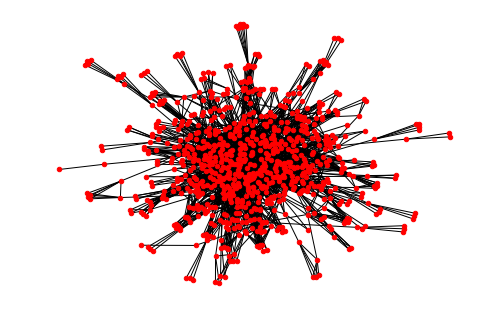

In [103]:
# Proviamo a fare la rappresentazione grafica.
plt.figure()
nx.draw(G1_LCC, node_color = "red", node_edge = "grey", node_size = 20)
plt.savefig("village1.pdf")

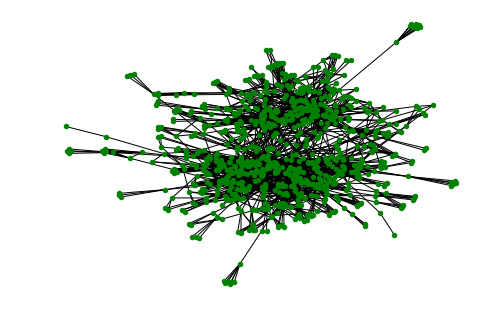

In [104]:
# lo stesso per l'altro villaggio
plt.figure()
nx.draw(G2_LCC, node_color = "green", node_edge = "grey", node_size = 20)
plt.savefig("village2.pdf")

In most visualizations (they are stochastics, so can change every time), you should find that the largest connected component of G2
appears to consist of two separate groups. These groups are called **network communities**. 

A community is a group of nodes that are densely connected to other nodes in the group, but only sparsely connected nodes outside of that group.

## Homework: Case Study 6
**Homophily** is a network characteristic.  **Homophily occurs when nodes that are neighbors in a network also share a characteristic more often than nodes that are not network neighbors**.  In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, **we will calculate the chance homophily for an arbitrary characteristic**. Homophily is the **proportion of edges in the network whose constituent nodes share that characteristic**. How much homophily do we expect by chance? If characteristics are distributed completely randomly, the probability that two nodes x and y share characteristic a is the probability both nodes have characteristic a, which is the frequency of a squared. **The total probability that nodes x and y share their characteristic is therefore the sum of the frequency of each characteristic in the network**. For **example, in the dictionary favorite_colors** provided, **the frequency of red and blue is 1/3 and 2/3 respectively, so the chance homophily is (1/3)^2+(2/3)^2 = 5/9.**

### Exercise 1
- Create a function that takes a dictionary *chars* with personal IDs as keys and characteristics as values, and returns a dictionary with characteristics as keys, and the frequency of their occurrence as values.
- Create a function chance_homophily(chars) that takes a dictionary chars defined as above and computes the chance homophily for that characteristic.
- A sample of three peoples' favorite colors is given in favorite_colors. Use your function to compute the chance homophily in this group, and store as color_homophily.
- Print color_homophily.

In [170]:
from collections import Counter
def frequency(chars):
    '''Take a dictionary "chars" with personal IDs as keys and characteristics as values, 
    and returns a dictionary with characteristics as keys and the frequency of their occurrence as values'''
    frequency = {}
    for key in chars:
        if chars[key] in frequency.keys():
            frequency[chars[key]] += 1
        else:
            frequency[chars[key]] = 1
    return frequency

In [171]:
dict = {"id1":"red","id2":"blue","id3":"red","id4":"green","id5": "pink"}
chars = frequency(dict)
print(chars)
#a = np.sum(list(chars.values()))
#a

{'red': 2, 'blue': 1, 'green': 1, 'pink': 1}


In [195]:
def chance_homophily(chars):
    freq = frequency(chars)
    chance_homophily = 0
    tot_occurr = np.sum(list(freq.values()))
    for key in freq:
        chance_homophily += np.square(freq[key] / tot_occurr)
    return chance_homophily

chance_homophily(chars) 



     

0.625

In [173]:
favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556


### Exercise 2
- Individual_characteristics.dta contains several characteristics for each individual in the dataset such as age, religion, and caste. Use the pandas library to read in and store these characteristics as a dataframe called df.
- Store separate datasets for individuals belonging to Villages 1 and 2 as df1 and df2, respectively. Note that some attributes may be missing for some individuals. In this case study, we will ignore rows of data where some column information is missing.
- Use the head method to display the first few entries of df1.

In [179]:
import pandas as pd
df  = pd.read_stata("individual_characteristics.dta")

df1 = df[df.village == 1]
df2 = df[df.village == 2]

df.head()



,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1,Yes,1.0,Yes,No,
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


### Exercise 3
- Define dictionaries with personal IDs as keys and a given covariate for that individual as values. Complete this for the sex, caste, and religion covariates, for Villages 1 and 2.
- For Village 1, store these dictionaries into variables named sex1, caste1, and religion1.
- For Village 2, store these dictionaries into variables named sex2, caste2, and religion2.

In [181]:
sex1      = df1.set_index("pid")["resp_gend"].to_dict()
caste1    = df1.set_index("pid")["caste"].to_dict()
religion1 = df1.set_index("pid")["religion"].to_dict()

sex2      = df2.set_index("pid")["resp_gend"].to_dict()
caste2    = df2.set_index("pid")["caste"].to_dict()
religion2 = df2.set_index("pid")["religion"].to_dict()

### Exercise 4
sex1, caste1, religion1, sex2, caste2, and religion2 are already defined from previous exercises. Use chance_homophily to compute the chance homophily for sex, caste, and religion In Villages 1 and 2. Is the chance homophily for any attribute very high for either village?

In [182]:
print("Village 1 chance of same sex:", chance_homophily(sex1))
# Enter your code here.
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))
print("Village 2 chance of same sex:", chance_homophily(sex2))
print("Village 2 chance of same caste:", chance_homophily(caste2))
print("Village 2 chance of same religion:", chance_homophily(religion2))

Village 1 chance of same sex: 0.5027299861680701
Village 1 chance of same caste: 0.6741488509791551
Village 1 chance of same religion: 0.9804896988521925
Village 2 chance of same sex: 0.5005945303210464
Village 2 chance of same caste: 0.425368244800893
Village 2 chance of same religion: 1.0


### Exercise 5
Complete the function homophily(), which takes a network G, a dictionary of characteristics chars, and node IDs IDs. For each node pair, determine whether a tie exists between them, as well as whether they share a characteristic. The total count of these is num_same_ties and num_ties respectively, and their ratio is the homophily of chars in G. Complete the function by choosing where to increment num_same_ties and num_ties.

In [192]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges():
        if n1 > n2:   # do not double-count edges!
            if IDs[n1] in chars and IDs[n2] in chars:
            
                if G.has_edge(n1, n2):
                    num_ties += 1
                if chars[IDs[n1]] == chars[IDs[n2]]:
                    num_same_ties += 1
    if num_ties != 0:
        return (num_same_ties / num_ties)
    else:
        return 0
    

### Exercise 6
In this dataset, each individual has a personal ID, or PID, stored in key_vilno_1.csv and key_vilno_2.csv for villages 1 and 2, respectively. data_filepath contains the base URL to the datasets used in this exercise. Use pd.read_csv to read in and store key_vilno_1.csv and key_vilno_2.csv as pid1 and pid2 respectively. The csv files have no headers, so make sure to include the parameter header = None.

In [193]:
data_filepath = ""
pid1 = pd.read_csv(data_filepath + "adj_allVillageRelationships_vilno_2.csv", dtype=int, header = None)
pid2 = pd.read_csv(data_filepath + "adj_allVillageRelationships_vilno_1.csv", dtype=int, header = None)

### Exercise 7
Use your homophily() function to compute the observed homophily for sex, caste, and religion in Villages 1 and 2. Print all six values.
Use the chance_homophily() to compare these values to chance homophily. Are these values higher or lower than that expected by chance?

In [194]:
print("Village 1 observed proportion of same sex:", homophily(G1, sex1, pid1))
print("Village 1 observed proportion of same caste:", homophily(G1, caste1, pid1))
print("Village 1 observed proportion of same religion:", homophily(G1, religion1, pid1))

print("Village 2 observed proportion of same sex:", homophily(G2, sex2, pid2))
print("Village 2 observed proportion of same caste:", homophily(G2, caste2, pid2))
print("Village 2 observed proportion of same religion:", homophily(G2, religion2, pid2))

print("Village 1 chance of same sex:", chance_homophily(sex1))
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))

print("Village 2 chance of same sex:", chance_homophily(sex2))
print("Village 2 chance of same caste:", chance_homophily(caste2))
print("Village 2 chance of same religion:", chance_homophily(religion2))

Village 1 observed proportion of same sex: 0
Village 1 observed proportion of same caste: 0
Village 1 observed proportion of same religion: 0
Village 2 observed proportion of same sex: 0
Village 2 observed proportion of same caste: 0
Village 2 observed proportion of same religion: 0
